In [1]:
import pandas, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

# 0. user-defined variables

In [3]:
data_file = 'data/results_all_2.mini.tsv'
data_file = 'data/results_all_2.tsv'

# 1. read data

In [4]:
%%time

df = pandas.read_csv(data_file, sep='\t', index_col=0)
print(df.shape)
df.head()

(534269, 84)
CPU times: user 3.16 s, sys: 227 ms, total: 3.38 s
Wall time: 3.39 s


,ens_gene.x,ext_gene.x,description.x,transcript_biotype.x,phenotype_description.x,pval.x,qval.x,test_stat,rss,degrees_free,...,tpm_6723_03T,tpm_6735_03T,tpm_6894_05T,tpm_6933_91T,tpm_7073_97T,tpm_7434_03T,tpm_7584_99T,tpm_7682_04T,tpm_7736_96T,tpm_8451_90T
target_id,,,,,,,,,,,,,,,,,,,,,
ENST00000000233.10,ENSG00000004059,ARF5,ADP ribosylation factor 5 [Source:HGNC Symbol;...,protein_coding,NaN,0.077165,0.113995,6.840320,10.501288,3,...,114.655000,191.169000,72.38650,115.218000,138.071000,167.285000,69.792300,138.103000,63.53900,208.35100
ENST00000000412.8,ENSG00000003056,M6PR,"mannose-6-phosphate receptor, cation dependent...",protein_coding,NaN,0.002894,0.012043,14.008057,63.004684,3,...,90.773900,56.598100,53.19330,0.032777,50.043900,83.845900,39.615200,74.390500,23.97510,4.66578
ENST00000000442.11,ENSG00000173153,ESRRA,estrogen related receptor alpha [Source:HGNC S...,protein_coding,NaN,0.039551,0.070502,8.336211,72.687989,3,...,26.497600,13.952300,12.44600,0.000031,30.699200,32.427800,7.900830,19.242200,3.99765,3.38110
ENST00000001008.6,ENSG00000004478,FKBP4,FKBP prolyl isomerase 4 [Source:HGNC Symbol;Ac...,protein_coding,NaN,0.560595,0.585758,2.057323,19.825575,3,...,144.594000,174.096000,84.22480,36.142300,150.107000,66.026300,29.413100,152.429000,24.95650,64.60810
ENST00000001146.7,ENSG00000003137,CYP26B1,cytochrome P450 family 26 subfamily B member 1...,protein_coding,Lethal occipital encephalocele-skeletal dyspla...,0.000356,0.002768,18.444875,286.710631,3,...,0.269256,0.475993,1.32339,0.000000,0.228477,0.418727,0.947123,0.658746,0.00000,0.00000


# 2. discard anything is not expression

In [5]:
print(len(df.columns), df.columns)

84 Index(['ens_gene.x', 'ext_gene.x', 'description.x', 'transcript_biotype.x',
       'phenotype_description.x', 'pval.x', 'qval.x', 'test_stat', 'rss',
       'degrees_free', 'mean_obs.x', 'var_obs.x', 'tech_var.x', 'sigma_sq.x',
       'smooth_sigma_sq.x', 'final_sigma_sq.x', 'ens_gene.y', 'ext_gene.y',
       'description.y', 'transcript_biotype.y', 'phenotype_description.y',
       'pval.y', 'qval.y', 'b', 'se_b', 'mean_obs.y', 'var_obs.y',
       'tech_var.y', 'sigma_sq.y', 'smooth_sigma_sq.y', 'final_sigma_sq.y',
       'tpm_0029_06T', 'tpm_0071_04T', 'tpm_0078_99T', 'tpm_0343_03T',
       'tpm_0432_04T', 'tpm_0489_92T', 'tpm_0650_03T', 'tpm_1161_03T',
       'tpm_1818_93T', 'tpm_1886_03T', 'tpm_1986_94T', 'tpm_2169_94N',
       'tpm_2169_94T', 'tpm_2453_03T', 'tpm_2460_03T', 'tpm_2561_04T',
       'tpm_2757_07T', 'tpm_3320_06T', 'tpm_3548_93T', 'tpm_3708_07T',
       'tpm_3768_03T', 'tpm_3849_98T', 'tpm_3863_06T', 'tpm_3974_03T',
       'tpm_4041_03T', 'tpm_4344_00N', 'tpm_4511_

In [6]:
# remove anything that is not expression
subdf = df.iloc[:, 31:]
print(len(subdf.columns), subdf.columns)

53 Index(['tpm_0029_06T', 'tpm_0071_04T', 'tpm_0078_99T', 'tpm_0343_03T',
       'tpm_0432_04T', 'tpm_0489_92T', 'tpm_0650_03T', 'tpm_1161_03T',
       'tpm_1818_93T', 'tpm_1886_03T', 'tpm_1986_94T', 'tpm_2169_94N',
       'tpm_2169_94T', 'tpm_2453_03T', 'tpm_2460_03T', 'tpm_2561_04T',
       'tpm_2757_07T', 'tpm_3320_06T', 'tpm_3548_93T', 'tpm_3708_07T',
       'tpm_3768_03T', 'tpm_3849_98T', 'tpm_3863_06T', 'tpm_3974_03T',
       'tpm_4041_03T', 'tpm_4344_00N', 'tpm_4511_03T', 'tpm_4750_92T',
       'tpm_4938_97T', 'tpm_5190_94T', 'tpm_5301_06T', 'tpm_5353_92N',
       'tpm_5403_94T', 'tpm_5610_99T', 'tpm_5667_92T', 'tpm_5715_93T',
       'tpm_5757_97T', 'tpm_5767_01T', 'tpm_5790_95T', 'tpm_5896_03T',
       'tpm_5953_98T', 'tpm_6157_03T', 'tpm_6603_03T', 'tpm_6723_03T',
       'tpm_6735_03T', 'tpm_6894_05T', 'tpm_6933_91T', 'tpm_7073_97T',
       'tpm_7434_03T', 'tpm_7584_99T', 'tpm_7682_04T', 'tpm_7736_96T',
       'tpm_8451_90T'],
      dtype='object')


In [7]:
subdf.head()

,tpm_0029_06T,tpm_0071_04T,tpm_0078_99T,tpm_0343_03T,tpm_0432_04T,tpm_0489_92T,tpm_0650_03T,tpm_1161_03T,tpm_1818_93T,tpm_1886_03T,...,tpm_6723_03T,tpm_6735_03T,tpm_6894_05T,tpm_6933_91T,tpm_7073_97T,tpm_7434_03T,tpm_7584_99T,tpm_7682_04T,tpm_7736_96T,tpm_8451_90T
target_id,,,,,,,,,,,,,,,,,,,,,
ENST00000000233.10,111.675000,114.374000,188.35000,131.485000,145.4220,375.50000,78.270800,183.87300,173.171000,134.16100,...,114.655000,191.169000,72.38650,115.218000,138.071000,167.285000,69.792300,138.103000,63.53900,208.35100
ENST00000000412.8,117.745000,64.112800,74.55690,6.035060,92.5266,7.52253,38.565200,47.13600,24.277900,85.02110,...,90.773900,56.598100,53.19330,0.032777,50.043900,83.845900,39.615200,74.390500,23.97510,4.66578
ENST00000000442.11,10.312000,12.326800,11.17670,0.503314,23.5787,7.90394,13.102300,24.91510,21.707000,18.87470,...,26.497600,13.952300,12.44600,0.000031,30.699200,32.427800,7.900830,19.242200,3.99765,3.38110
ENST00000001008.6,146.097000,61.339500,80.53130,62.334100,163.2460,197.80300,61.574100,76.23020,45.626800,210.63100,...,144.594000,174.096000,84.22480,36.142300,150.107000,66.026300,29.413100,152.429000,24.95650,64.60810
ENST00000001146.7,0.528833,0.219197,1.01809,0.000000,1.7998,0.00000,0.898261,1.85144,0.092946,0.71914,...,0.269256,0.475993,1.32339,0.000000,0.228477,0.418727,0.947123,0.658746,0.00000,0.00000


# 3. discard low expression transcripts

In [8]:
subdf.shape

(534269, 53)

In [9]:
expressed_transcripts = subdf[subdf.max(axis=1) > 300]
print(expressed_transcripts.shape)
expressed_transcripts.head()

(11020, 53)


,tpm_0029_06T,tpm_0071_04T,tpm_0078_99T,tpm_0343_03T,tpm_0432_04T,tpm_0489_92T,tpm_0650_03T,tpm_1161_03T,tpm_1818_93T,tpm_1886_03T,...,tpm_6723_03T,tpm_6735_03T,tpm_6894_05T,tpm_6933_91T,tpm_7073_97T,tpm_7434_03T,tpm_7584_99T,tpm_7682_04T,tpm_7736_96T,tpm_8451_90T
target_id,,,,,,,,,,,,,,,,,,,,,
ENST00000000233.10,111.675,114.3740,188.3500,131.4850,145.422,375.500,78.2708,183.8730,173.1710,134.161,...,114.655,191.169,72.3865,115.21800,138.071,167.2850,69.7923,138.103,63.5390,208.35100
ENST00000001008.6,146.097,61.3395,80.5313,62.3341,163.246,197.803,61.5741,76.2302,45.6268,210.631,...,144.594,174.096,84.2248,36.14230,150.107,66.0263,29.4131,152.429,24.9565,64.60810
ENST00000007516.8,211.818,142.8900,186.9820,150.7210,161.158,173.630,84.8956,107.9640,158.6990,205.692,...,148.734,209.807,159.8630,66.67740,155.994,210.3510,85.2654,140.166,58.0021,80.16240
ENST00000009180.10,641.298,240.5410,354.9830,39.0735,331.203,159.654,141.6790,129.9010,729.3860,391.266,...,151.547,401.972,182.9570,8.56216,207.572,239.9180,141.7160,292.532,123.2310,5.70122
ENST00000009589.8,5400.010,1775.4200,2479.4400,4467.6900,2349.890,4827.790,1396.2700,2981.7500,2544.2900,2428.870,...,3609.040,2112.840,1582.9300,1593.41000,2088.110,2433.4300,2448.0100,1655.330,1444.3400,5038.82000


# 4. bring expression to log2 TPM

In [10]:
log2_expressed_transcripts = numpy.log2(expressed_transcripts + 1)
log2_expressed_transcripts.head()

,tpm_0029_06T,tpm_0071_04T,tpm_0078_99T,tpm_0343_03T,tpm_0432_04T,tpm_0489_92T,tpm_0650_03T,tpm_1161_03T,tpm_1818_93T,tpm_1886_03T,...,tpm_6723_03T,tpm_6735_03T,tpm_6894_05T,tpm_6933_91T,tpm_7073_97T,tpm_7434_03T,tpm_7584_99T,tpm_7682_04T,tpm_7736_96T,tpm_8451_90T
target_id,,,,,,,,,,,,,,,,,,,,,
ENST00000000233.10,6.816024,6.850174,7.564912,7.049685,7.193989,8.556506,6.308718,7.530391,7.444361,7.078535,...,6.853684,7.586232,6.197443,6.860690,7.119678,7.394763,6.145521,7.120010,6.012099,7.709780
ENST00000001008.6,7.200624,5.962075,6.349282,5.984911,7.359714,7.635196,5.967494,6.271093,5.543088,7.725407,...,7.185807,7.452002,6.413201,5.214991,7.239427,6.066655,4.926621,7.261427,4.698024,6.035802
ENST00000007516.8,7.733476,7.168823,7.554451,7.245277,7.341256,7.448158,6.424512,6.767708,7.319211,7.691339,...,7.226258,7.719779,7.329689,6.080602,7.294566,7.723497,6.430710,7.141249,5.882694,6.342740
ENST00000009180.10,9.327099,7.916124,8.475665,5.324577,8.375921,7.327813,7.156629,7.032332,9.512515,8.615688,...,7.253110,8.654536,7.523225,3.257337,7.704402,7.912398,7.157003,8.197374,6.956881,2.744424
ENST00000009589.8,12.399014,10.794757,11.276380,12.125636,11.198991,12.237446,10.448395,11.542427,11.313614,11.246663,...,11.817799,11.045650,10.629293,10.638807,11.028673,11.249368,11.257983,10.693774,10.497193,12.299156


# 5. histogram

17.75851602419938


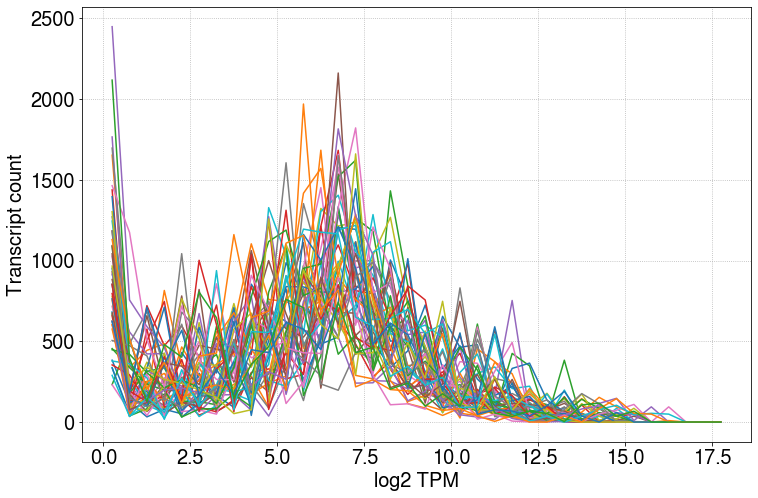

In [13]:
absolute_max = 0
working_samples = log2_expressed_transcripts.columns.to_list()

for sample in working_samples:
    
    log2TPM = log2_expressed_transcripts.loc[:, sample]
    if max(log2TPM) > absolute_max:
        absolute_max = max(log2TPM)
        
    hist, bin_edges = numpy.histogram(log2TPM, bins=18*2, range=(0, 18))
    
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    matplotlib.pyplot.plot(x, hist, )
    
matplotlib.pyplot.xlabel('log2 TPM')
matplotlib.pyplot.ylabel('Transcript count')
matplotlib.pyplot.grid(ls=':')

print(absolute_max)